Text(0, 0.5, 'Score')

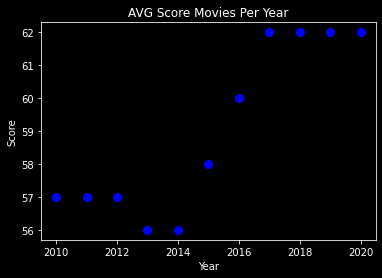

In [32]:
import json
# open username and password from another file.
with open('C:\\Users\\xianx\\Documents\\xianw_secret.json') as f:
      data = json.load(f)
      username = data['username']
      password = data['password']
#print (username+" :" +password)

# import pyodbc
import pyodbc
# setup connection to SQLserver, with specific credentials
connection=pyodbc.connect("DRIVER={SQL Server};"
                          "SERVER=LAPTOP-8VUQJOSL;"
                          "DATABASE=python_movies;"
                          "Trusted_Connection=Yes;"
                          "UID="+username+";"
                          "PWD="+password)
cursor=connection.cursor()
sql="SELECT avg(Score),YEAR(ReleaseDate) as ReleaseYear from [dbo].[MetacriticMovies] GROUP BY YEAR(ReleaseDate) order by year(ReleaseDate)"
cursor.execute(sql)
avgScore=cursor.fetchall()
#print(rows)

# import library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

plt.style.use('dark_background')

years=[]
avgs=[]

#metaplotlib hitogram
#import numpy as np

for row in avgScore:
     avgs.append(row[0])
     years.append(row[1])
     plt.plot(row[1],row[0],'bo', linewidth=2, markersize=8)
        
# add lables
plt.title('AVG Score Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Score')



